In [43]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import io

scene:  ./assets/light/0000_light_0.jpg
target:  ./assets/light/0000.jpg
258


(<AxesSubplot:title={'center':'output'}>,
 Text(0.5, 1.0, 'output'))

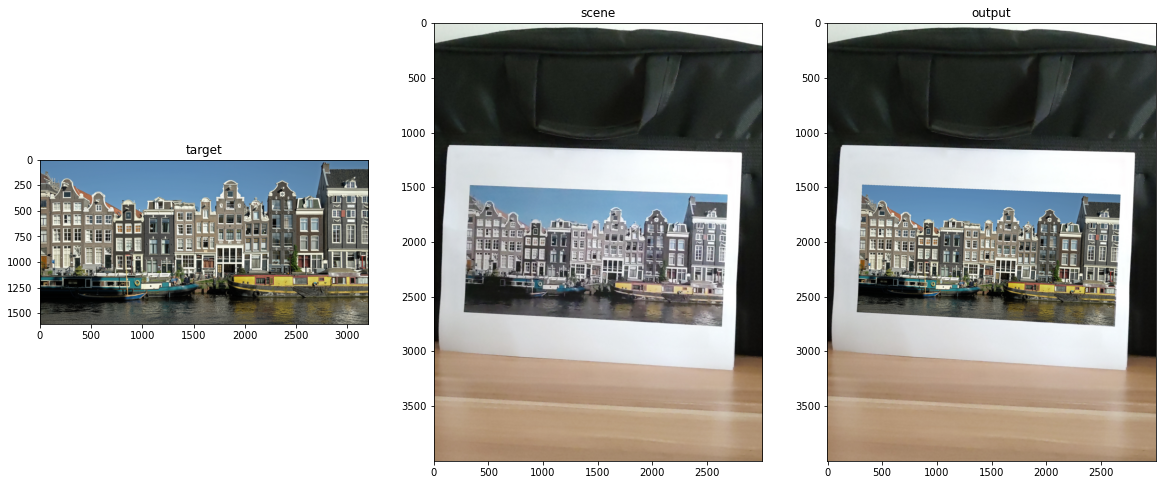

In [42]:
root = './assets/light/'
id = 0
scene_path = root + str(id).zfill(4) + "_light_0.jpg"
target_path = root + str(id).zfill(4) + ".jpg"
print('scene: ',scene_path)
print('target: ', target_path)
scene = cv2.imread(scene_path)
source = cv2.imread(target_path)
target = cv2.imread(target_path)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(target, None)
kp2, des2 = orb.detectAndCompute(scene,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
print(len(matches))
img3 = cv2.drawMatches(target, kp1, scene, kp2, matches[:50], target, flags=2)

src_pts = np.float32([kp1[m.queryIdx].pt for m in matches[:50]]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches[:50]]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
out = cv2.warpPerspective(target, M, (scene.shape[1], scene.shape[0]))

intensity = np.linalg.norm(out, axis=2)
mask = (intensity == 0)[:,:,np.newaxis]
blend = (out * (1 - mask) + scene * mask).astype(np.uint8)
blend = cv2.resize(blend, (scene.shape[1], scene.shape[0]))
plt.figure(figsize=(20,30))
plt.subplot(131), plt.imshow(target[:,:,::-1]), plt.title('target')
plt.subplot(132), plt.imshow(scene[:,:,::-1]), plt.title('scene')
plt.subplot(133), plt.imshow(blend[:,:,::-1]), plt.title('output')



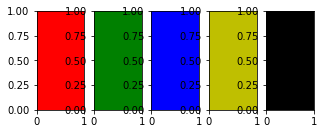